   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

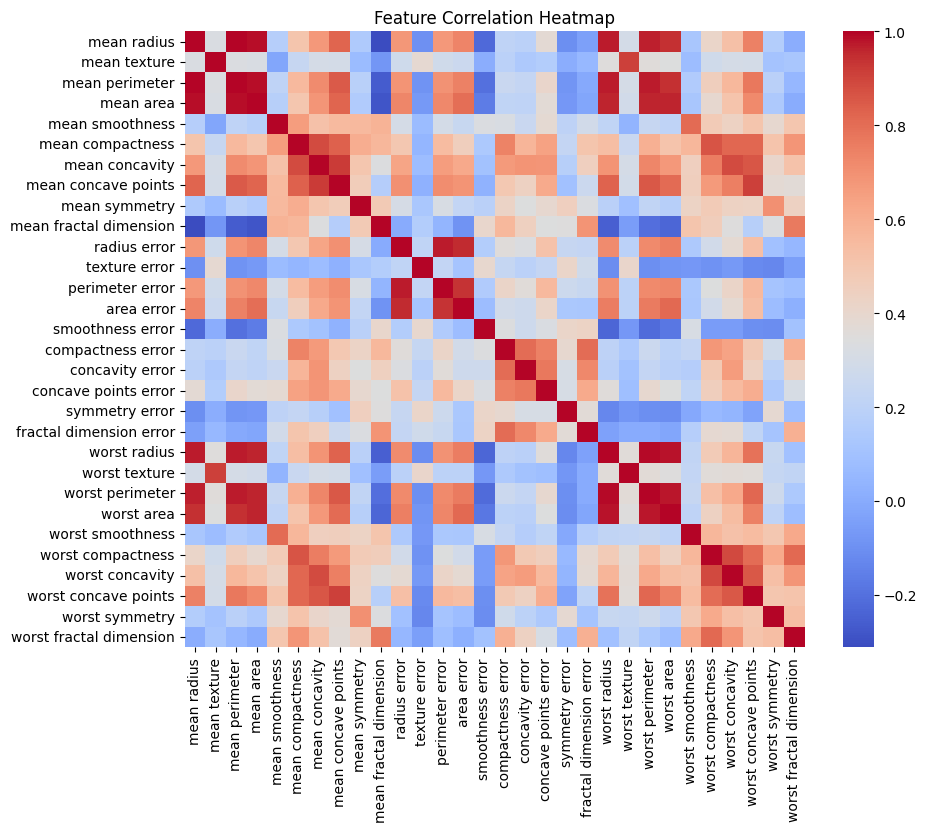

Confusion Matrix:
 [[41  1]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Cross Entropy Loss: 0.07782506224011196
10-Fold Cross Validation Accuracy: 97.72% (+/- 1.76%)
Accuracy with 90:10 train:test ratio = 0.9649
Accuracy with 80:20 train:test ratio = 0.9825
Accuracy with 70:30 train:test ratio = 0.9825
Accuracy with 60:40 train:test ratio = 0.9868


In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, log_loss

# Step 2: Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Step 3: Explore Dataset
print(X.head())
print(X.describe())
print(y.value_counts())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 4: Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply ML Model (Logistic Regression)
model = LogisticRegression(max_iter=10000)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluation - Confusion Matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Cross-Entropy Loss (Log Loss)
y_pred_prob = model.predict_proba(X_test)
loss = log_loss(y_test, y_pred_prob)
print("Cross Entropy Loss:", loss)

# Step 8: 10-Fold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
print("10-Fold Cross Validation Accuracy: %.2f%% (+/- %.2f%%)" % (scores.mean() * 100, scores.std() * 100))

# Step 9: Train with Different Ratios
ratios = [0.1, 0.2, 0.3, 0.4]
for test_ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, stratify=y, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Accuracy with {int((1-test_ratio)*100)}:{int(test_ratio*100)} train:test ratio = {acc:.4f}")
